In [1]:
import numpy as np
import optics as op
import matplotlib.pyplot as plt
import skimage as ski
import os

In [2]:
original = ski.color.rgb2gray(ski.io.imread('source_images/Synthetic512.png'))
clean_sim = ski.io.imread('output_images/synthetic_grated_256_sim.tif')[:, :, 0]

# Noise types and intensity levels
noise_types = ['gaussian_noise', 'poisson_noise', 'saltpepper_noise']
intensities = ['1percent_noise', '5percent_noise', '10percent_noise', '20percent_noise']

# Filters used for denoising
filter_names = ['wiener', 'tv', 'bm3d', 'rl']
image_prefix = 'synthetic_grated_256_sim'

folder_path = f'output_images/{noise_types[0]}/{intensities[1]}/'


noisy_sim = ski.io.imread(os.path.join(folder_path, 'noisy_image_256_sim.tif'))[:, :, 0]
wiener_sim = ski.io.imread(os.path.join(folder_path, f'{filter_names[0]}_{image_prefix}.tif'))[:, :, 0]
tv_sim = ski.io.imread(os.path.join(folder_path, f'{filter_names[1]}_{image_prefix}.tif'))[:, :, 0]
bm3d_sim = ski.io.imread(os.path.join(folder_path, f'{filter_names[2]}_{image_prefix}.tif'))[:, :, 0]
rl_sim = ski.io.imread(os.path.join(folder_path, f'{filter_names[3]}_{image_prefix}.tif'))[:, :, 0]


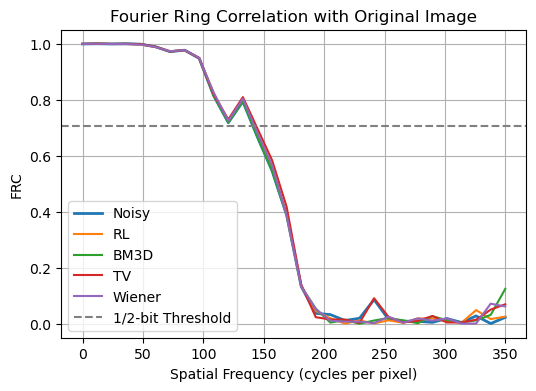

In [3]:

# Plot the images
metric = original
bins = 30
frc = np.zeros((5, 2, bins))
frc[0][0], frc[0][1] = op.frc(metric, noisy_sim, bins)
frc[1][0], frc[1][1] = op.frc(metric, wiener_sim, bins)
frc[2][0], frc[2][1] = op.frc(metric, tv_sim, bins)
frc[3][0], frc[3][1] = op.frc(metric, bm3d_sim, bins)
frc[4][0], frc[4][1] = op.frc(metric, rl_sim, bins)

# Plot the FRC curve
plt.figure(figsize=(6, 4))
plt.plot(frc[0][1], frc[0][0], label="Noisy", linewidth=2)
plt.plot(frc[1][1], frc[1][0], label="RL")
plt.plot(frc[2][1], frc[2][0], label="BM3D")
plt.plot(frc[3][1], frc[3][0], label="TV")
plt.plot(frc[4][1], frc[4][0], label="Wiener")
plt.axhline(y=1/np.sqrt(2), color='grey', linestyle='--', label="1/2-bit Threshold")
plt.xlabel("Spatial Frequency (cycles per pixel)")
plt.ylabel("FRC")
plt.title("Fourier Ring Correlation with Original Image")
plt.legend()
plt.grid()
plt.show()

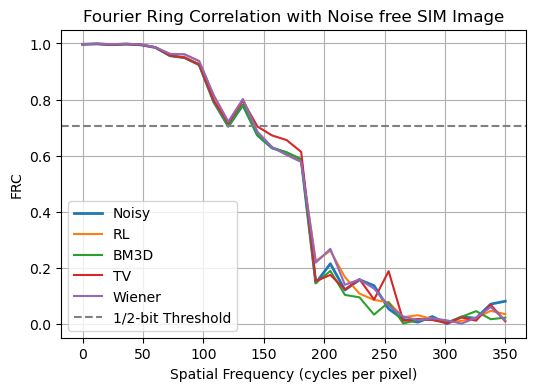

In [4]:
# Plot the images
metric = clean_sim
bins = 30
frc = np.zeros((5, 2, bins))
frc[0][0], frc[0][1] = op.frc(metric, noisy_sim, bins)
frc[1][0], frc[1][1] = op.frc(metric, wiener_sim, bins)
frc[2][0], frc[2][1] = op.frc(metric, tv_sim, bins)
frc[3][0], frc[3][1] = op.frc(metric, bm3d_sim, bins)
frc[4][0], frc[4][1] = op.frc(metric, rl_sim, bins)

# Plot the FRC curve
plt.figure(figsize=(6, 4))
plt.plot(frc[0][1], frc[0][0], label="Noisy", linewidth=2)
plt.plot(frc[1][1], frc[1][0], label="RL")
plt.plot(frc[2][1], frc[2][0], label="BM3D")
plt.plot(frc[3][1], frc[3][0], label="TV")
plt.plot(frc[4][1], frc[4][0], label="Wiener")
plt.axhline(y=1/np.sqrt(2), color='grey', linestyle='--', label="1/2-bit Threshold")
plt.xlabel("Spatial Frequency (cycles per pixel)")
plt.ylabel("FRC")
plt.title("Fourier Ring Correlation with Noise free SIM Image")
plt.legend()
plt.grid()
plt.show()

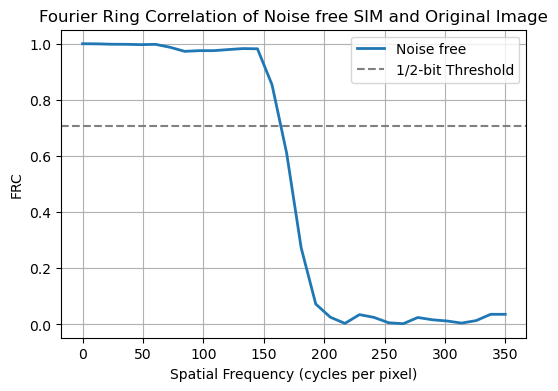

In [5]:
bins = 30
frc = np.zeros((1, 2, bins))
frc[0][0], frc[0][1] = op.frc(original, clean_sim, bins)


# Plot the FRC curve
plt.figure(figsize=(6, 4))
plt.plot(frc[0][1], frc[0][0], label="Noise free", linewidth=2)
plt.axhline(y=1/np.sqrt(2), color='grey', linestyle='--', label="1/2-bit Threshold")
plt.xlabel("Spatial Frequency (cycles per pixel)")
plt.ylabel("FRC")
plt.title("Fourier Ring Correlation of Noise free SIM and Original Image")
plt.legend()
plt.grid()
plt.show()